Nadyla Alfiena Candra
PYTN-KS17-012
ASSIGMENT 3

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df_can = pd.read_csv(r'D:\HACKTIV\Tugas HACTIV\FOLDER HAKCTIV\bank-additional\bank-additional\bank-additional.csv', sep=';')
df_can.bank = pd.DataFrame(df_can)
df_can.bank.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22388\2174636369.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_can.bank = pd.DataFrame(df_can)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
df_can.bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_can.bank.shape

(41188, 21)

In [5]:
df_can.bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##Decision TREE

In [6]:
df_can.bank['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [7]:
convert = {"marital": {"married":0,"single":1,"divorced":2,"unknown":3},
          "job":{"admin.":0,"blue-collar":1,"technician":2,"services":3,"management":4,"retired":5,"self-employed":6,"entrepreneur":7,"unemployed":8,"housemaid":9,"student":10,"unknown":11},
"education":{"university.degree":0,"high.school":1,"basic.9y":2,"professional.course":3,"basic.4y":4,"basic.6y":5,"unknown":6,"illiterate":7},
         "default":{"no":0,"unknown":1,"yes":2},
          "housing":{"no":0,"unknown":1,"yes":2},
          "loan":{"no":0,"unknown":1,"yes":2},
          "contact":{"cellular":0,"telephone":1},
          "month":{"mar":0,"apr":1,"may":2,"jun":3,"jul":4,"aug":5,"sep":6,"oct":7,"nov":8,"dec":9},
         "day_of_week":{"mon":0,"tue":1,"wed":2,"thu":3,"fri":4},
          "poutcome":{"nonexistent":0,"failure":1,"success":2},}

In [8]:
df_can = df_can.replace(convert)

In [9]:
df_can

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,0,4,0,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,3,0,1,1,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,3,0,1,0,2,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,5,0,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,3,0,1,0,0,2,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,3,0,2,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,0,3,0,0,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,0,0,0,2,0,0,8,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,2,0,3,0,0,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
#pengelompokan data
la=['marital','job','education','default','housing','loan','contact','month','day_of_week','poutcome']
y=['yes','no']
all_inputs = df_can[la]
all_classes = df_can['y']

In [11]:
(x_train,x_test,y_train,y_test)= train_test_split(all_inputs,all_classes,train_size=0.7,random_state=1)

In [12]:
#Pengolahan data
clf =DecisionTreeClassifier(random_state=0)

In [13]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
#skor
score = clf.score(x_test,y_test)
print(score)

0.8680100347980901


In [15]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
from matplotlib import pyplot as plt

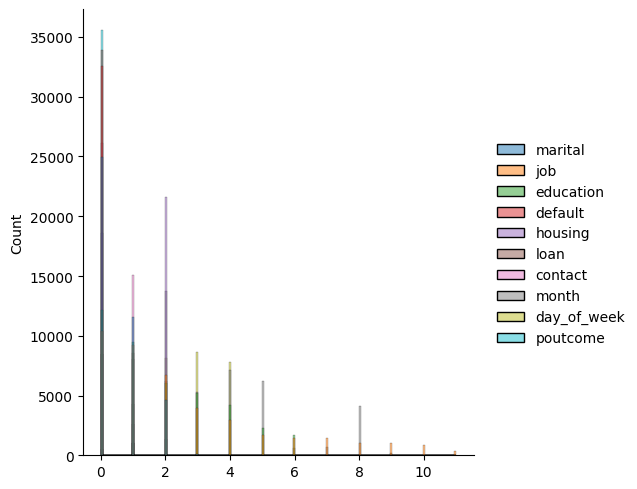

In [21]:
sns.displot(all_inputs)

#Logistic Regession

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [25]:
df_can = pd.read_csv(r'C:\Users\Punya Lutfi\Coba\bank-additional\bank-additional-full.csv', sep=';')
df_can.bank = pd.DataFrame(df_can)
df_can.bank.head()

C:\Users\Punya Lutfi\AppData\Local\Temp\ipykernel_4816\2187891720.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_can.bank = pd.DataFrame(df_can)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
convert = {"marital": {"married":0,"single":1,"divorced":2,"unknown":3},
          "job":{"admin.":0,"blue-collar":1,"technician":2,"services":3,"management":4,"retired":5,"self-employed":6,"entrepreneur":7,"unemployed":8,"housemaid":9,"student":10,"unknown":11},
"education":{"university.degree":0,"high.school":1,"basic.9y":2,"professional.course":3,"basic.4y":4,"basic.6y":5,"unknown":6,"illiterate":7},
         "default":{"no":0,"unknown":1,"yes":2},
          "housing":{"no":0,"unknown":1,"yes":2},
          "loan":{"no":0,"unknown":1,"yes":2},
          "contact":{"cellular":0,"telephone":1},
          "month":{"mar":0,"apr":1,"may":2,"jun":3,"jul":4,"aug":5,"sep":6,"oct":7,"nov":8,"dec":9},
         "day_of_week":{"mon":0,"tue":1,"wed":2,"thu":3,"fri":4},
          "poutcome":{"nonexistent":0,"failure":1,"success":2},}

In [27]:
df_can = df_can.replace(convert)

In [28]:
df_can

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,0,4,0,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,3,0,1,1,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,3,0,1,0,2,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,5,0,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,3,0,1,0,0,2,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,3,0,2,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,0,3,0,0,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,0,0,0,2,0,0,8,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,2,0,3,0,0,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [31]:
#pengelompokan data
wa=['marital','job','education','default','housing','loan','contact','month','day_of_week','poutcome']
p=['yes','no']
all_inputs = df_can[wa]
all_classes = df_can['y']

In [36]:
(x_train,x_test,y_train,y_test)= train_test_split(all_inputs,all_classes,random_state=1)

In [37]:
x_train.shape

(30891, 10)

In [38]:
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = log_reg.predict(x_test)

In [40]:
confusion_matrix(y_test,y_pred)

array([[9072,   60],
       [1073,   92]], dtype=int64)

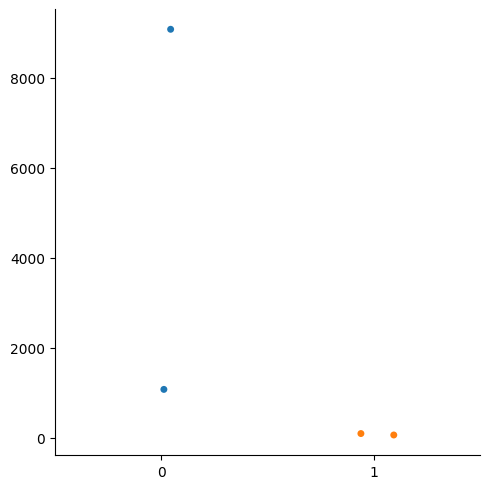

In [45]:
sns.catplot(confusion_matrix(y_test,y_pred))

#KNN

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [47]:
df_can = pd.read_csv(r'C:\Users\Punya Lutfi\Coba\bank-additional\bank-additional-full.csv', sep=';')
df_can.bank = pd.DataFrame(df_can)
df_can.bank.head()

C:\Users\Punya Lutfi\AppData\Local\Temp\ipykernel_4816\2187891720.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_can.bank = pd.DataFrame(df_can)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
x=df_can.iloc[:, :-1].values
y=df_can.iloc[:,4].values

In [56]:
convert = {"marital": {"married":0,"single":1,"divorced":2,"unknown":3},
          "job":{"admin.":0,"blue-collar":1,"technician":2,"services":3,"management":4,"retired":5,"self-employed":6,"entrepreneur":7,"unemployed":8,"housemaid":9,"student":10,"unknown":11},
"education":{"university.degree":0,"high.school":1,"basic.9y":2,"professional.course":3,"basic.4y":4,"basic.6y":5,"unknown":6,"illiterate":7},
         "default":{"no":0,"unknown":1,"yes":2},
          "housing":{"no":0,"unknown":1,"yes":2},
          "loan":{"no":0,"unknown":1,"yes":2},
          "contact":{"cellular":0,"telephone":1},
          "month":{"mar":0,"apr":1,"may":2,"jun":3,"jul":4,"aug":5,"sep":6,"oct":7,"nov":8,"dec":9},
         "day_of_week":{"mon":0,"tue":1,"wed":2,"thu":3,"fri":4},
          "poutcome":{"nonexistent":0,"failure":1,"success":2},}

In [57]:
df_can = df_can.replace(convert)

In [58]:
df_can

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,0,4,0,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,3,0,1,1,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,3,0,1,0,2,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,5,0,0,0,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,3,0,1,0,0,2,1,2,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,3,0,2,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,0,3,0,0,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,0,0,0,2,0,0,8,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,2,0,3,0,0,0,0,8,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [74]:
#pengelompokan data
ma=['marital','job','education','default','housing','loan','contact','month','day_of_week','poutcome']
w=['yes','no']
all_inputs = df_can[ma]
all_classes = df_can['y']

In [75]:
(x_train,x_test,y_train,y_test)= train_test_split(all_inputs,all_classes,random_state=1)

In [76]:
from sklearn.preprocessing import StandardScaler
scal= StandardScaler()
scal.fit(x_train)
x_train = scal.transform(x_train)
x_test = scal.transform(x_test)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
clas = KNeighborsClassifier(n_neighbors=5)
clas.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
y_pred=clas.predict(x_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9132
         yes       0.54      0.21      0.30      1165

    accuracy                           0.89     10297
   macro avg       0.72      0.59      0.62     10297
weighted avg       0.86      0.89      0.87     10297

[[8929  203]
 [ 926  239]]


<Axes: >

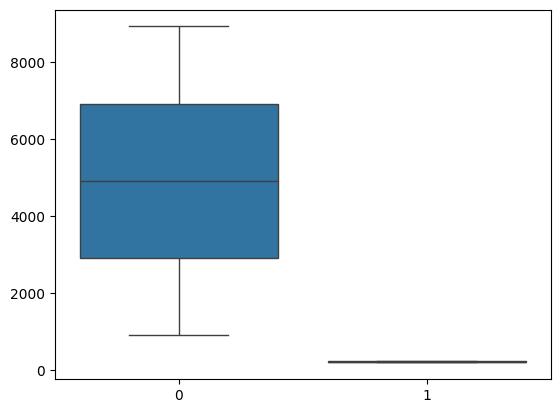

In [86]:
sns.boxplot(confusion_matrix(y_test,y_pred))